In [9]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import os

from blume.model.post_props import Props
from blume.process import plot_file, exact_m
from blume.run import new_folder, sweep_T, save

T_c = 2 / np.log(1 + np.sqrt(2))

In [13]:
dir = new_folder()

for chi in [4, 8, 12, 24]:
    data = sweep_T(
        chi=chi,
        T_range=(2, 2.29),
        step=0.0001,
        tol=1e-9,
        max_steps=int(10e8),
        use_prev=True,
    )
    save(data, dir)

chi = 4:  97%|█████████▋| 612/634 [00:52<00:33,  1.55s/it]

In [5]:
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

## Phase diagram

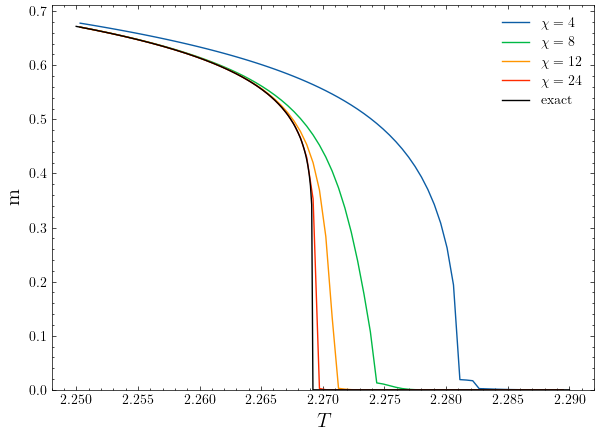

In [6]:
plt.figure(figsize=(7, 5))
T_range = (2.25, 2.29)
chis = [4, 8, 12, 24]
for chi in chis:
    plot_file(chi, range=T_range, prop=Props.m, folder=dir)
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="exact")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

## Free energy

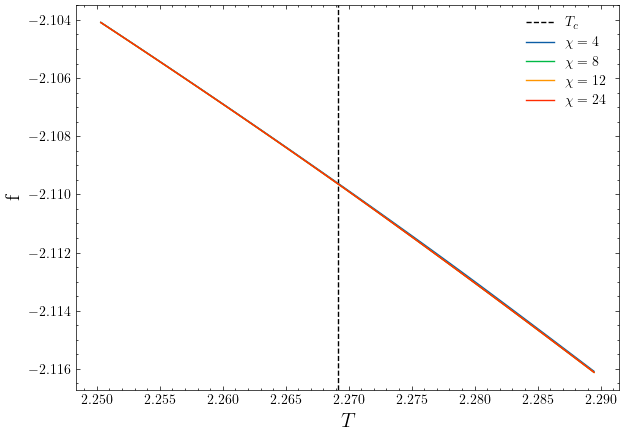

In [10]:
plt.figure(figsize=(7, 5))
T_range = (1, 4)
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
for chi in chis:
    plot_file(chi, range=T_range, prop=Props.f, folder=dir)

plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"f", fontsize=15)
plt.savefig(f"{path_dir}/free energies")

## Computational cost

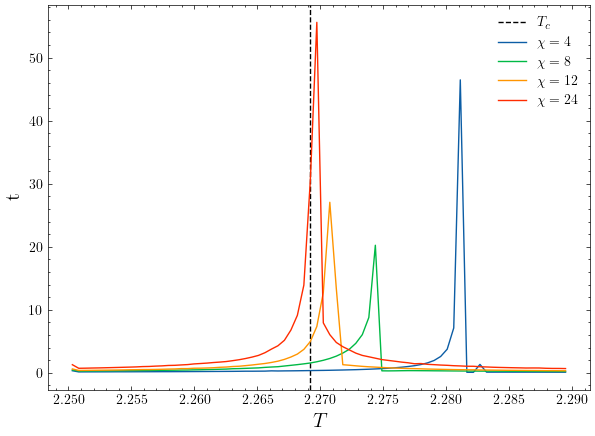

In [11]:
plt.figure(figsize=(7, 5))
T_range = (1, 4)
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
for chi in chis:
    plot_file(chi, range=T_range, prop="execution times", folder=dir)

plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"t", fontsize=15)
plt.savefig(f"{path_dir}/execution times")

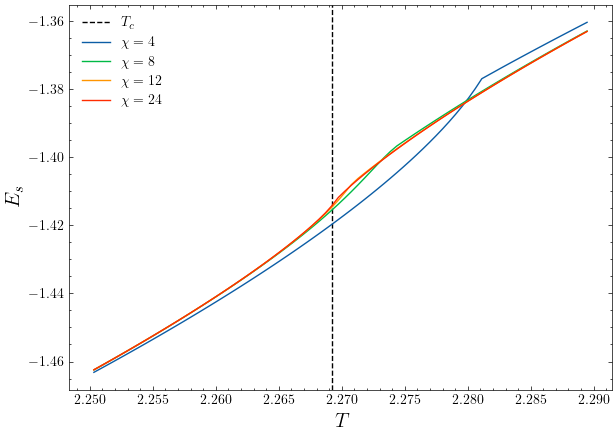

In [12]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2, 2.3)
for chi in chis:
    plot_file(chi, range=T_range, prop=Props.Es, folder=dir)
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$E_s$", fontsize=15)
plt.savefig(f"{path_dir}/energies per site")